In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import pyvis
from pyvis.network import Network
import seaborn as sns
from cdlib import algorithms
import igraph  # Ensure igraph is installed
import leidenalg  # Ensure leidenalg is installed


 


Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer', 'infomap', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [2]:
!pip install igraph



In [3]:
relationship_df = pd.read_csv('../documents/workspace/Relationship_Dataframe.txt', delimiter='\t') 
relationship_df.head(10)

,source,target,value
0,France,Russia,1
1,France,Russia,1
2,Germany,Russia,1
3,Bulgaria,Germany,1
4,France,Russia,1
5,Germany,Russia,1
6,Bulgaria,Germany,1
7,Bulgaria,Russia,1
8,France,Russia,1
9,Germany,Russia,1


In [4]:
G = nx.from_pandas_edgelist(relationship_df, source = "source", target = " target", edge_attr =  "value", create_using = nx.Graph())

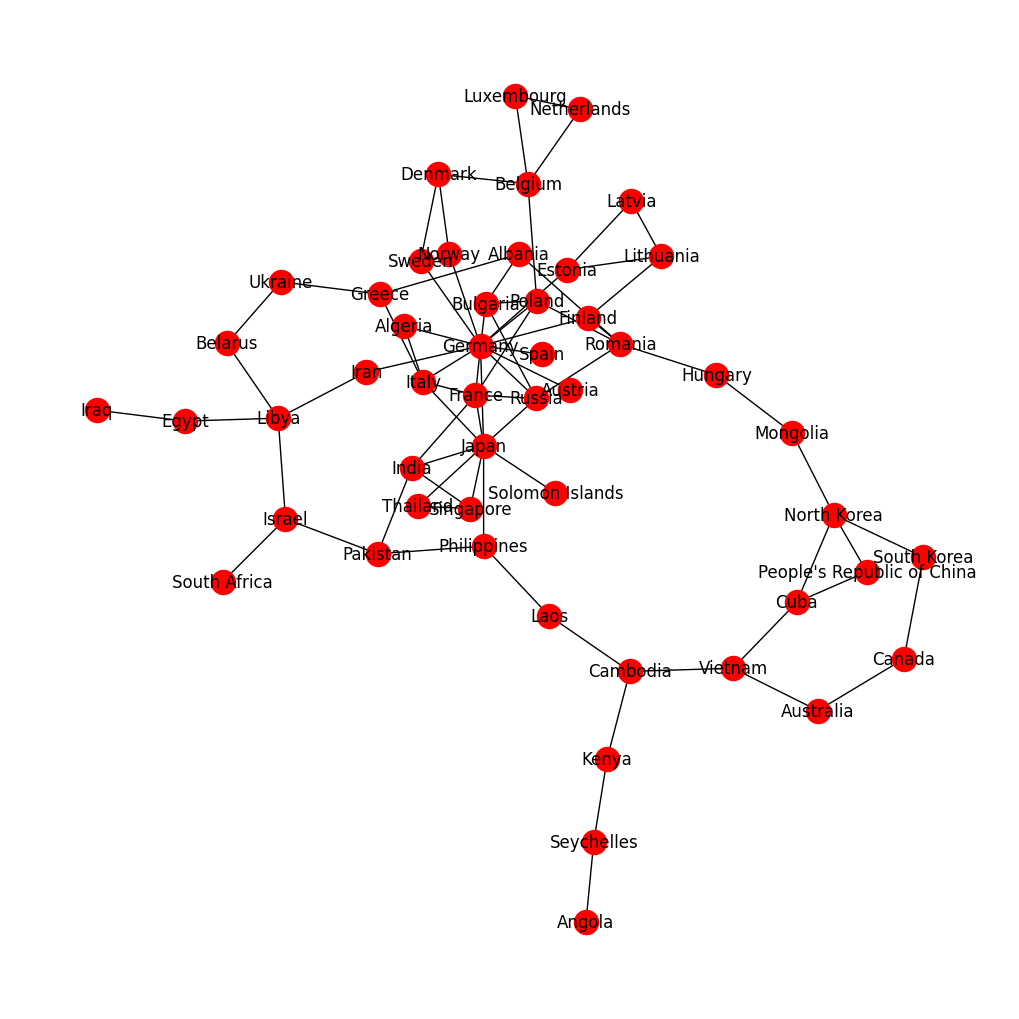

In [5]:
#static network graph using only NetworkX.

plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)


In [6]:
# Interactive network graph - using pyvis

# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
Node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, Node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_= True)
net.repulsion()
net.show("Country_Historic_Events.html")


Country_Historic_Events.html


In [7]:
# Leiden algorithm to detect any communities within the countries.

coms = algorithms.leiden(G)
new_com = coms.to_node_community_map()

new_com


defaultdict(list,
            {'Cambodia': [0],
             'Kenya': [0],
             'Seychelles': [0],
             'Angola': [0],
             'North Korea': [0],
             'Cuba': [0],
             "People's Republic of China": [0],
             'South Korea': [0],
             'Canada': [0],
             'Australia': [0],
             'Vietnam': [0],
             'Germany': [1],
             'Italy': [1],
             'Austria': [1],
             'Spain': [1],
             'Denmark': [1],
             'Norway': [1],
             'Sweden': [1],
             'Algeria': [1],
             'Bulgaria': [2],
             'Poland': [2],
             'Albania': [2],
             'Greece': [2],
             'Romania': [2],
             'Hungary': [2],
             'Mongolia': [2],
             'France': [3],
             'Russia': [3],
             'Japan': [3],
             'Thailand': [3],
             'Singapore': [3],
             'Solomon Islands': [3],
             'India': [3],


In [8]:
dict_com = {k:v[0] for k, v in new_com.items()}


In [11]:
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("Country_Community.html")

Country_Community.html


The Leiden algorithm works by exploring modularity. It tries to maximize the difference between the expected and actual number of edges in a community. Pair of countries that are close to one another would exhibit frequent communication, which would return in the end edge calculation, and they would likely end up in the same community. The red group consists of countries that appear at the beginning of the wiki page. Germany seems to be the most active and center of these historic events.

In [16]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.12,
 'Russia': 0.1,
 'Germany': 0.28,
 'Bulgaria': 0.08,
 'Italy': 0.1,
 'Austria': 0.02,
 'Spain': 0.02,
 'Poland': 0.1,
 'Estonia': 0.06,
 'Latvia': 0.04,
 'Lithuania': 0.06,
 'Finland': 0.06,
 'Belgium': 0.08,
 'Netherlands': 0.04,
 'Luxembourg': 0.04,
 'Denmark': 0.06,
 'Norway': 0.04,
 'Sweden': 0.04,
 'Albania': 0.06,
 'Greece': 0.06,
 'Ukraine': 0.04,
 'Belarus': 0.04,
 'Libya': 0.08,
 'Egypt': 0.04,
 'Iraq': 0.02,
 'Japan': 0.18,
 'Algeria': 0.04,
 'Thailand': 0.04,
 'Singapore': 0.06,
 'Philippines': 0.06,
 'Solomon Islands': 0.02,
 'India': 0.08,
 'Pakistan': 0.06,
 'Israel': 0.06,
 'South Africa': 0.02,
 'Iran': 0.04,
 'Laos': 0.04,
 'Cambodia': 0.06,
 'Kenya': 0.04,
 'Seychelles': 0.04,
 'Angola': 0.02,
 'Romania': 0.1,
 'Hungary': 0.04,
 'Mongolia': 0.04,
 'North Korea': 0.08,
 'Cuba': 0.06,
 "People's Republic of China": 0.04,
 'South Korea': 0.04,
 'Canada': 0.04,
 'Australia': 0.04,
 'Vietnam': 0.06}

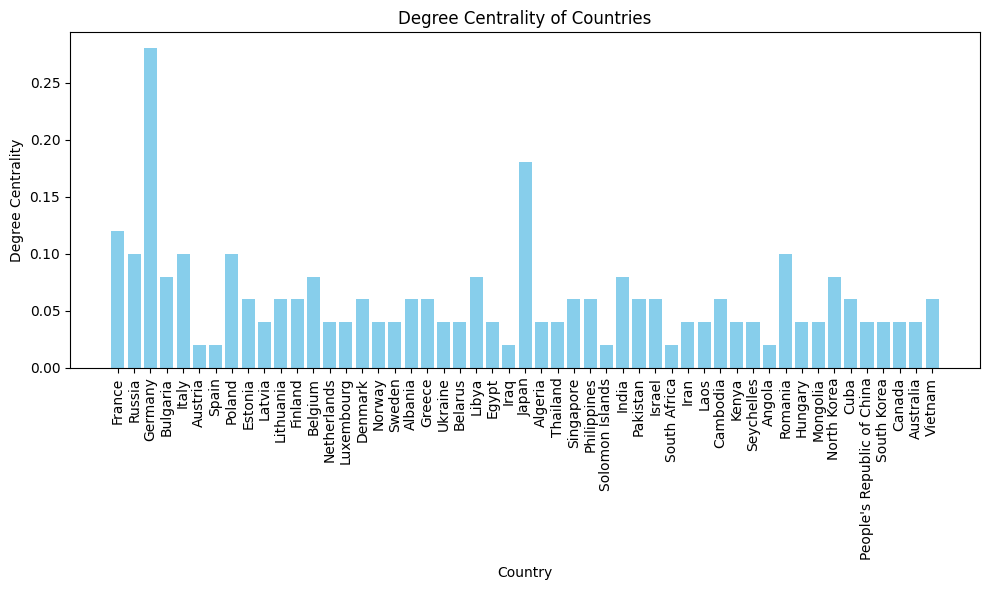

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(degree_dict.keys(), degree_dict.values(), color='skyblue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Countries')
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

In [27]:
degree_dict_1 = nx.closeness_centrality(G)
degree_dict_1

{'France': 0.3184713375796178,
 'Russia': 0.31645569620253167,
 'Germany': 0.352112676056338,
 'Bulgaria': 0.28735632183908044,
 'Italy': 0.2994011976047904,
 'Austria': 0.2617801047120419,
 'Spain': 0.2617801047120419,
 'Poland': 0.3067484662576687,
 'Estonia': 0.26737967914438504,
 'Latvia': 0.22123893805309736,
 'Lithuania': 0.23148148148148148,
 'Finland': 0.29239766081871343,
 'Belgium': 0.24509803921568626,
 'Netherlands': 0.1984126984126984,
 'Luxembourg': 0.1984126984126984,
 'Denmark': 0.22935779816513763,
 'Norway': 0.26881720430107525,
 'Sweden': 0.26881720430107525,
 'Albania': 0.25510204081632654,
 'Greece': 0.2631578947368421,
 'Ukraine': 0.2222222222222222,
 'Belarus': 0.211864406779661,
 'Libya': 0.25,
 'Egypt': 0.20242914979757085,
 'Iraq': 0.16891891891891891,
 'Japan': 0.33783783783783783,
 'Algeria': 0.26595744680851063,
 'Thailand': 0.25510204081632654,
 'Singapore': 0.2604166666666667,
 'Philippines': 0.30303030303030304,
 'Solomon Islands': 0.25380710659898476,
 

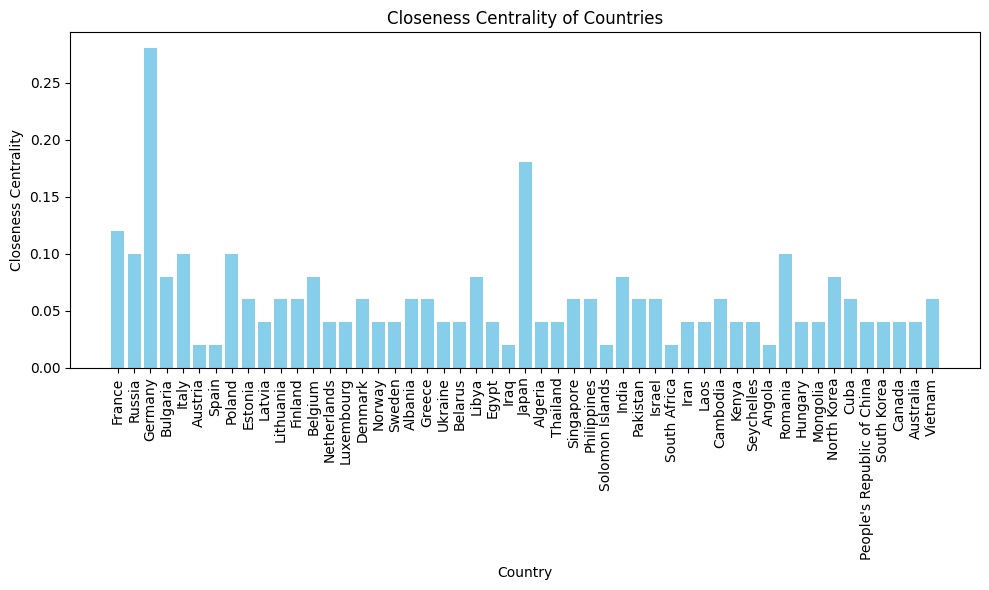

In [28]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(degree_dict_1.keys(), degree_dict.values(), color='skyblue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Countries')
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

In [29]:
degree_dict_2 = nx.betweenness_centrality(G)
degree_dict_2

{'France': 0.05328862973760933,
 'Russia': 0.07154033041788141,
 'Germany': 0.41891642371234217,
 'Bulgaria': 0.019306122448979595,
 'Italy': 0.0570184645286686,
 'Austria': 0.0,
 'Spain': 0.0,
 'Poland': 0.14714674441205047,
 'Estonia': 0.04564625850340135,
 'Latvia': 0.0,
 'Lithuania': 0.009714285714285713,
 'Finland': 0.05447327502429543,
 'Belgium': 0.08694655004859086,
 'Netherlands': 0.0,
 'Luxembourg': 0.0,
 'Denmark': 0.005306122448979592,
 'Norway': 0.014077745383867833,
 'Sweden': 0.014077745383867833,
 'Albania': 0.028957240038872692,
 'Greece': 0.05000291545189503,
 'Ukraine': 0.017006802721088433,
 'Belarus': 0.01183673469387755,
 'Libya': 0.13978620019436344,
 'Egypt': 0.04,
 'Iraq': 0.0,
 'Japan': 0.2934091350826044,
 'Algeria': 0.0,
 'Thailand': 0.0,
 'Singapore': 0.0012244897959183675,
 'Philippines': 0.24294363459669582,
 'Solomon Islands': 0.0,
 'India': 0.03289601554907678,
 'Pakistan': 0.08098931000971818,
 'Israel': 0.08210884353741497,
 'South Africa': 0.0,
 'Ira

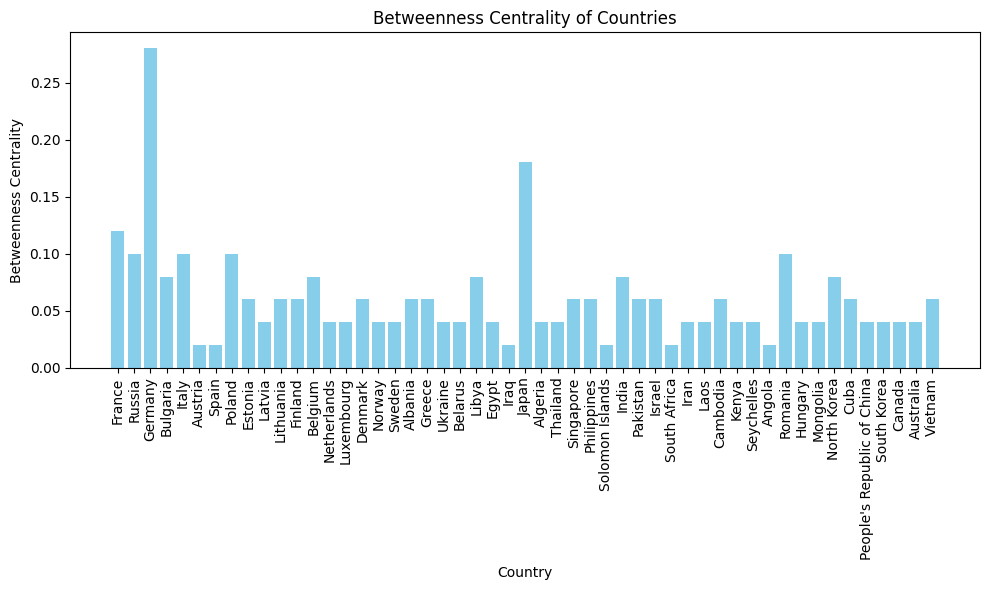

In [30]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(degree_dict_2.keys(), degree_dict.values(), color='skyblue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Countries')
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

Germany has the highest degree centrality among all the countries, standing out significantly compared to others.
Japan and Australia also have relatively high degree centrality values, but still lower than Germany.
Several countries such as Austria, Spain, Belarus, Greece, and Laos have very low degree centrality values, suggesting they are less connected in the network.
The distribution of degree centrality values varies widely across countries, with a few countries having very high centrality and many countries clustering around low to moderate values.